# **Crowd** **Counting**

In [ ]:
w!rm -rf

In [ ]:
 #Git clone method (for development)
!git clone https://github.com/ultralytics/ultralytics


Cloning into 'ultralytics'...
remote: Enumerating objects: 7197, done.
remote: Counting objects: 100% (800/800), done.
remote: Compressing objects: 100% (452/452), done.
remote: Total 7197 (delta 425), reused 662 (delta 344), pack-reused 6397
Receiving objects: 100% (7197/7197), 5.60 MiB | 10.62 MiB/s, done.
Resolving deltas: 100% (4780/4780), done.


In [ ]:
import numpy as np
import pandas as pd
from glob import glob
import shutil
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns
import cv2
from os.path import isfile, join
from IPython.display import Image, clear_output
import subprocess
import torch


# Copy Source Movie

In [ ]:
#!ls /kaggle/working/ultralytics

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# mp4 source
tpath0='/content/drive/MyDrive/frames/'


In [ ]:
print(os.listdir('/content/drive/MyDrive/frames/'))

['seq_001003.jpg', 'seq_001004.jpg', 'seq_001005.jpg', 'seq_001006.jpg', 'seq_001007.jpg', 'seq_001008.jpg', 'seq_001009.jpg', 'seq_001010.jpg', 'seq_001011.jpg', 'seq_001012.jpg', 'seq_001013.jpg', 'seq_001014.jpg', 'seq_001015.jpg', 'seq_001016.jpg', 'seq_001017.jpg', 'seq_001018.jpg', 'seq_001019.jpg', 'seq_001020.jpg', 'seq_001021.jpg', 'seq_001022.jpg', 'seq_001023.jpg', 'seq_001024.jpg', 'seq_001026.jpg', 'seq_001025.jpg', 'seq_001027.jpg', 'seq_001028.jpg', 'seq_001029.jpg', 'seq_001030.jpg', 'seq_001031.jpg', 'seq_001032.jpg', 'seq_001033.jpg', 'seq_001034.jpg', 'seq_001035.jpg', 'seq_001037.jpg', 'seq_001036.jpg', 'seq_001038.jpg', 'seq_001040.jpg', 'seq_001039.jpg', 'seq_001042.jpg', 'seq_001041.jpg', 'seq_001043.jpg', 'seq_001045.jpg', 'seq_001044.jpg', 'seq_001046.jpg', 'seq_001047.jpg', 'seq_001048.jpg', 'seq_001049.jpg', 'seq_001050.jpg', 'seq_001051.jpg', 'seq_001052.jpg', 'seq_001054.jpg', 'seq_001053.jpg', 'seq_001055.jpg', 'seq_001056.jpg', 'seq_001057.jpg', 'seq_0010

In [ ]:
import shutil
shutil.copytree(tpath0,'/content/drive/MyDrive/frames dest/',  copy_function = shutil.copy)

'/content/drive/MyDrive/frames dest/'

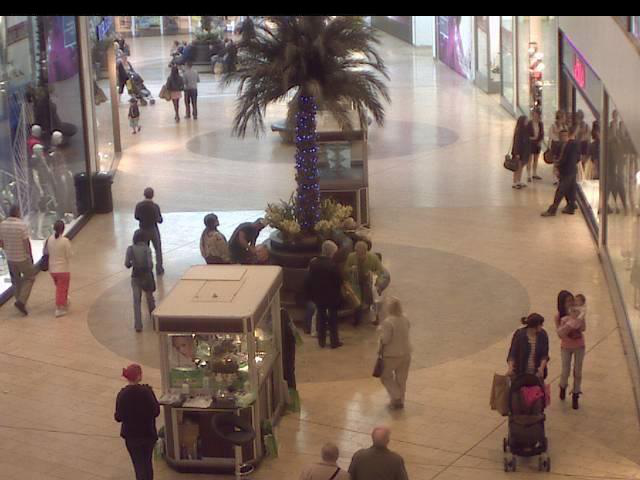

In [ ]:
from PIL import Image
#Image.open("/kaggle/working/sample1/frames/seq_000001.jpg")
Image.open("/content/drive/MyDrive/frames/seq_000001.jpg")


# YOLOv8

In [ ]:
clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cu118 CPU


# weight: yolov8n.pt

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.86 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/107.7 GB disk)


In [ ]:
#!yolo task=detect mode=predict model=yolov8x.pt imgsz=640 conf=0.05 source=../working/sample1/frames save_txt=True save_conf=True
!yolo task=detect mode=predict model=yolov8x.pt imgsz=640 conf=0.05 source=../content/drive/MyDrive/frames save_txt=True save_conf=True


Ultralytics YOLOv8.0.86 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

image 1/2010 /content/drive/MyDrive/frames/seq_000001.jpg: 480x640 24 persons, 1 truck, 3 backpacks, 14 handbags, 8 suitcases, 3 potted plants, 3321.7ms
image 2/2010 /content/drive/MyDrive/frames/seq_000002.jpg: 480x640 25 persons, 1 truck, 2 backpacks, 11 handbags, 1 suitcase, 4 potted plants, 3031.5ms
image 3/2010 /content/drive/MyDrive/frames/seq_000003.jpg: 480x640 28 persons, 1 car, 1 truck, 1 backpack, 10 handbags, 1 suitcase, 4 potted plants, 4817.1ms
image 4/2010 /content/drive/MyDrive/frames/seq_000004.jpg: 480x640 36 persons, 1 truck, 11 handbags, 1 suitcase, 3 potted plants, 2947.2ms
image 5/2010 /content/drive/MyDrive/frames/seq_000005.jpg: 480x640 33 persons, 1 truck, 8 handbags, 3 suitcases, 4 potted plants, 2903.8ms
image 6/2010 /content/drive/MyDrive/frames/seq_000006.jpg: 480x640 28 persons, 1 truck, 1 backpack, 12 handbags,

In [ ]:
!ls /kaggle/working/runs/detect/predict

ls: cannot access '/kaggle/working/runs/detect/predict': No such file or directory


In [ ]:
#txt_dir='/kaggle/working/runs/detect/predict3/labels'
txt_dir='/content/runs/detect/predict/labels'

txtpaths=[]
texts=sorted(os.listdir(txt_dir))
cnt = 0
res = []
#for i in np.loadtxt(os.path.join(txt_dir,texts[0])):

for i in range(0,2000):
    cnt = 0
    for j in range(0,len(np.loadtxt(os.path.join(txt_dir,texts[i])))):
        #if (np.loadtxt(os.path.join(txt_dir,texts[i]))[j][0] == 0.0):
        if (np.loadtxt(os.path.join(txt_dir,texts[i]))[j][0] == 0.0):
             cnt += 1
    res.append(cnt)

In [ ]:
#org = list(pd.read_csv('/kaggle/input/crowd-counting/labels.csv')['count'])[0:2000]
org = list(pd.read_csv('/content/labels.csv')['count'])[0:2000]

In [ ]:
difference = [a - b for a, b in zip(org, res)]

In [ ]:
# plt.figure(figsize=(10,10))
# sns.set_style("darkgrid")
# sns.set_context("talk")
# sns.displot(difference, kind ='kde', color="blue")
# plt.title('Error distribution', fontsize=20)
# plt.xlabel('Error', fontsize=15)
# plt.ylabel('Density', fontsize=15)

# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
#plt.show()
# plt.figure(figsize=(10,10))
# sns.displot(difference, kind ='kde')
# plt.title('Error distribution')

In [ ]:
mae = np.mean(np.abs(np.array(res) - np.array(org)))

In [ ]:
mae

7.8775

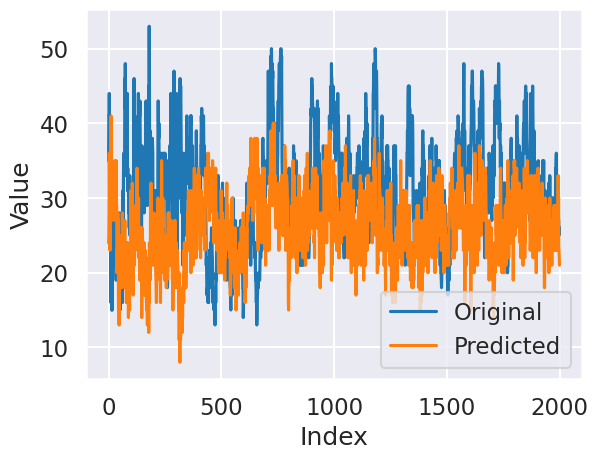

In [ ]:
import matplotlib.pyplot as plt

# Create x-axis values
x = range(len(org))

# Create the plot
plt.plot(x, org, label='Original')
plt.plot(x, res, label='Predicted')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()

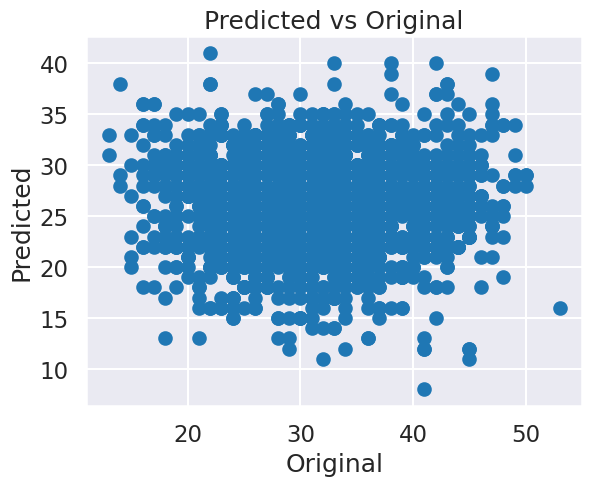

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(org, res)

# Add labels and title
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Predicted vs Original')

# Show the plot
plt.show()

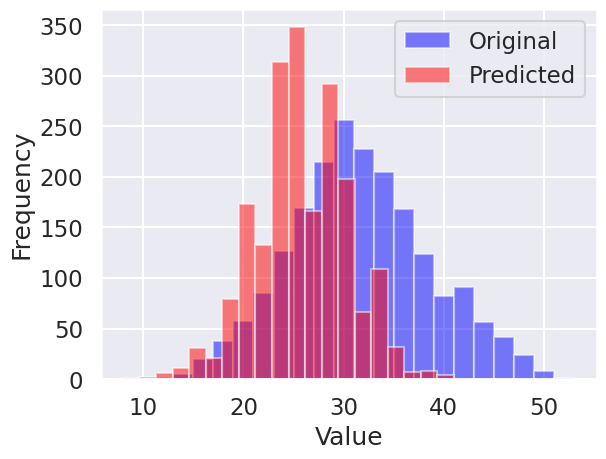

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(org, bins=20, color='blue', alpha=0.5, label='Original')
plt.hist(res, bins=20, color='red', alpha=0.5, label='Predicted')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

**CROWD DETECTION**

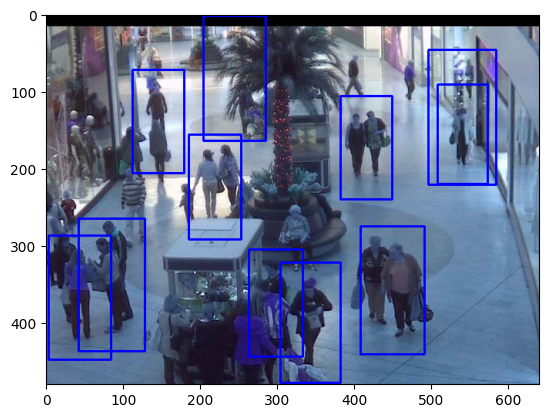

In [ ]:
import cv2
import imutils
from matplotlib import pyplot as plt

# Initializing the HOG person
# detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Reading the Image
image = cv2.imread('/content/drive/MyDrive/frames/seq_000906.jpg')

# Resizing the Image
image = imutils.resize(image,
                       width=min(4000, image.shape[1]))

# Detecting all the regions in the
# Image that has a pedestrians inside it
(regions, _) = hog.detectMultiScale(image,
                                    winStride=(4, 4),
                                    padding=(4, 4),
                                    scale=1.05)

# Drawing the regions in the Image
for (x, y, w, h) in regions:
    cv2.rectangle(image, (x, y),
                  (x + w, y + h),
                  (0, 0, 255), 2)

# Showing the output Image
plt.imshow(image)
plt.show()

#cv2.imshow("Image", image)
#cv2.waitKey(0)

#cv2.destroyAllWindows()

**CROWD DETECTION ALONG WITH OBJECT DETECTION**

In [ ]:
import time
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL
from PIL.ImageDraw import Draw

In [ ]:
def reconstruct_path(image_id: int) -> str:
    """Function transforms numerical image ID
    into a relative file path filling in leading zeros
    and adding file extension and directory.
    :param image_id: Image ID
    :return: Relative path to the image
    """
    image_id = str(image_id).rjust(6, '0')
    return f'../input/crowd-counting/frames/frames/seq_{image_id}.jpg'


def detect_objects(path: str, model) -> dict:
    """Function extracts image from a file, adds new axis
    and passes the image through object detection model.
    :param path: File path
    :param model: Object detection model
    :return: Model output dictionary
    """
    image_tensor = tf.image.decode_jpeg(
        tf.io.read_file(path), channels=3)[tf.newaxis, ...]
    return model(image_tensor)
def count_persons(path: str, model, threshold=0.) -> int:
    """Function counts the number of persons in an image
    processing "detection_classes" output of the model
    and taking into account confidence threshold.
    :param path: File path
    :param model: Object detection model
    :param threshold: Threshold for confidence scores
    :return: Number of people for one image
    """
    results = detect_objects(path, model)
    # Class ID 1 = "person"
    return (results['detection_classes'].numpy()[0] == 1)[np.where(
        results['detection_scores'].numpy()[0] > threshold)].sum()


def draw_bboxes(image_path, data: dict, threshold=0.) -> PIL.Image:
    """Function displays an image with bounding boxes
    overlaid for every detected person.
    :param image_path: File path to an image
    :param data: Output of objects detection model for this image
    :param threshold: Threshold for confidence scores
    :return: PIL.Image object
    """
    image = PIL.Image.open(image_path)
    draw = Draw(image)

    im_width, im_height = image.size
    boxes = data['detection_boxes'].numpy()[0]
    classes = data['detection_classes'].numpy()[0]
    scores = data['detection_scores'].numpy()[0]

    for i in range(int(data['num_detections'][0])):
        if classes[i] == 1 and scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                          ymin * im_height, ymax * im_height)
            draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)],
                      width=4, fill='red')

    return image


def set_display():
    """Function sets display options for charts and pd.DataFrames.
    """
    # Plots display settings
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = 12, 8
    plt.rcParams.update({'font.size': 14})
    # DataFrame display settings
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.4f}'.format

In [ ]:
# EfficientDet model
MODEL_PATH = 'https://tfhub.dev/tensorflow/efficientdet/d0/1'

In [ ]:
# Load the model.
detector = hub.load(MODEL_PATH)

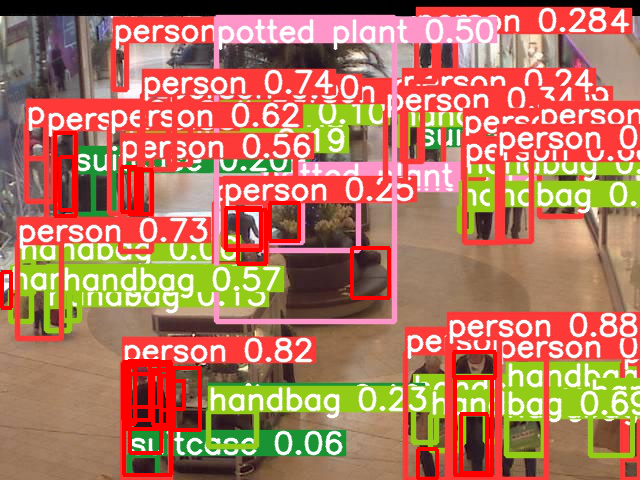

In [ ]:
#Object detection with no confidence threshold results in
# duplicate bounding boxes and false positives.
# Total number of people in an image is overestimated.
# Some mannequins are erroneously marked as people.
example_path = '../content/runs/detect/predict/seq_000010.jpg'
results = detect_objects(example_path, detector)
draw_bboxes(example_path, results)

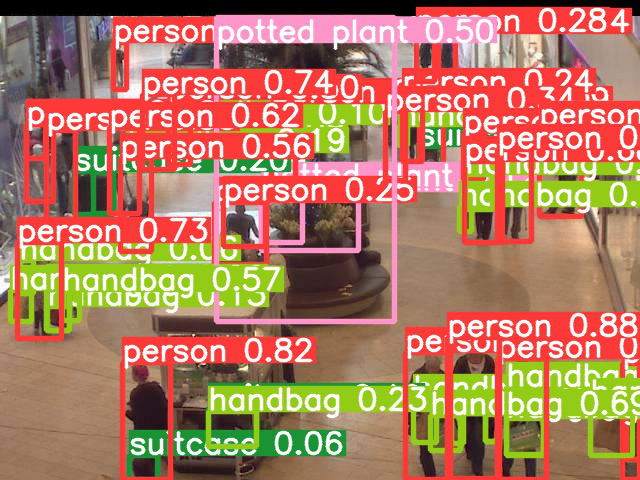

In [ ]:
# With high threshold the model underestimates the number of people
# selecting only the most obvious objects at the foreground.
draw_bboxes(example_path, results, threshold=0.5)

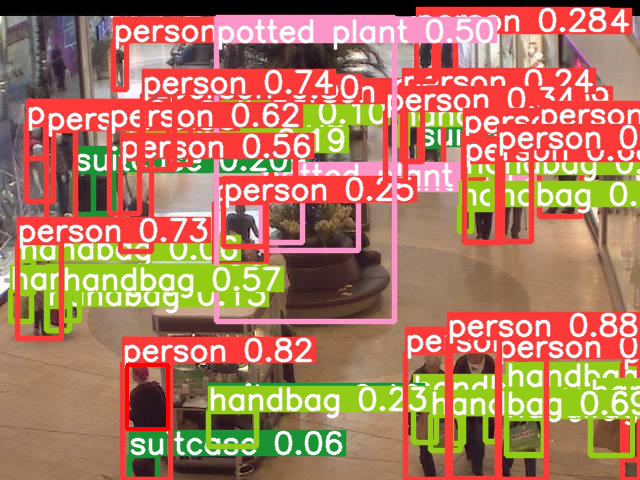

In [ ]:
# With relatively low threshold the model is most accurate counting people
# that are located at the foreground and the middle of the picture.
# Objects at the background are mostly ignored.
draw_bboxes(example_path, results, threshold=0.25)

In [ ]:
arr=[1,2,3]
y=[]
n=len(arr)
i=0
while i< n:
    x=arr[i]*arr[i]
    y.append(x)
    i=i+1
    print(i)


print(y)


1
2
3
[1, 4, 9]
